In [1]:
# Se importan las librerias necesarias
import numpy as np
import pandas as pd

In [2]:
#Se importa el archivo a trabajar
archivo=r"C:\Users\aoban\Jupyter\Corfoga\Consumo carne\ConsumoCarne.xlsx"
dfcarne=pd.read_excel(archivo,sheet_name="Base")

In [3]:
dfcarne.head(5) #Se imprime el encabezado

,Mes,Año,Producción de Carne,Exportaciones,Importaciones,Consumo,Población Estimada,Consumo per Cápita Mensual
0,Enero,2008,7754680,1483436.32,447817.0,6719060.68,4404090.0,1.525641
1,Febrero,2008,6488300,1443171.90,533677.0,5578805.10,4404090.0,1.266733
2,Marzo,2008,5323580,1157490.19,585337.0,4751426.81,4404090.0,1.078867
3,Abril,2008,6294410,1403794.69,722164.0,5612779.31,4404090.0,1.274447
4,Mayo,2008,7420950,1224876.21,519187.0,6715260.79,4404090.0,1.524778


In [4]:
dfcarne.dtypes # Se verifican las variables

Mes                            object
Año                             int64
Producción de Carne             int64
Exportaciones                 float64
Importaciones                 float64
Consumo                       float64
Población Estimada            float64
Consumo per Cápita Mensual    float64
dtype: object

In [5]:
dfcarne.shape # Se verifica el tamaño del set de datos 

(167, 8)

In [6]:
dfcarne.isnull().count() # Se verifican los valores nulos

Mes                           167
Año                           167
Producción de Carne           167
Exportaciones                 167
Importaciones                 167
Consumo                       167
Población Estimada            167
Consumo per Cápita Mensual    167
dtype: int64

<h3 style="color:#B29522"> Cual es el consumo de carne percapita en el año 2021? </h3>

In [7]:
#Se busca el año y las variables
mes=dfcarne.loc[dfcarne["Año"]==2021,["Mes","Producción de Carne","Exportaciones","Importaciones","Consumo","Población Estimada","Consumo per Cápita Mensual"]]
mes

,Mes,Producción de Carne,Exportaciones,Importaciones,Consumo,Población Estimada,Consumo per Cápita Mensual
156,Enero,7503520,2603659.780,826849.0,5726709.220,5163038.0,1.109174
157,Febrero,7170940,2835980.170,859786.0,5194745.830,5163038.0,1.006141
158,Marzo,6997750,2602816.240,867158.0,5262091.760,5163038.0,1.019185
159,Abril,8269190,2203415.170,894068.0,6959842.830,5163038.0,1.348013
160,Mayo,6753950,3150490.380,709086.0,4312545.620,5163038.0,0.835273
161,Junio,6861360,2280204.190,760710.0,5341865.810,5163038.0,1.034636
162,Julio,8422140,2776196.170,844473.0,6490416.830,5163038.0,1.257093
163,Agosto,7570910,2840184.117,801810.0,5532535.883,5163038.0,1.071566
164,Septiembre,9255200,3213789.560,827902.0,6869312.440,5163038.0,1.330479
165,Octubre,7442570,2491626.160,761049.0,5711992.840,5163038.0,1.106324


In [8]:
# Se agrupa por consumo percapita
capita=mes.groupby(mes["Mes"])["Consumo per Cápita Mensual"].mean()
capita.reset_index(level=0)

,Mes,Consumo per Cápita Mensual
0,Abril,1.348013
1,Agosto,1.071566
2,Enero,1.109174
3,Febrero,1.006141
4,Julio,1.257093
5,Junio,1.034636
6,Marzo,1.019185
7,Mayo,0.835273
8,Noviembre,1.143045
9,Octubre,1.106324


In [9]:
#Se reordena el index
new=["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre"]
capita=capita.reindex(new,axis=0)
capita=capita.reset_index(level=0)
capita

,Mes,Consumo per Cápita Mensual
0,Enero,1.109174
1,Febrero,1.006141
2,Marzo,1.019185
3,Abril,1.348013
4,Mayo,0.835273
5,Junio,1.034636
6,Julio,1.257093
7,Agosto,1.071566
8,Septiembre,1.330479
9,Octubre,1.106324


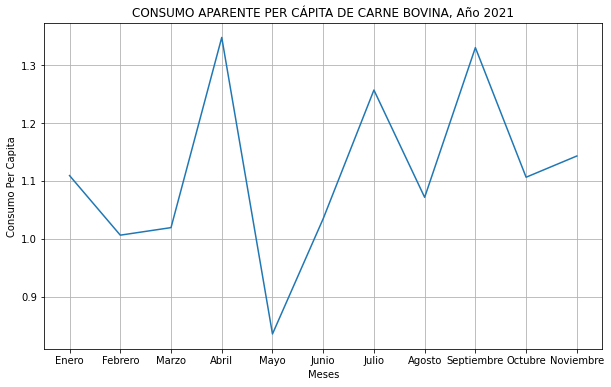

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting

x = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre"]

y = capita["Consumo per Cápita Mensual"].tolist()

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='Meses', ylabel='Consumo Per Capita',
       title='CONSUMO APARENTE PER CÁPITA DE CARNE BOVINA, Año 2021')
ax.grid()

plt.xticks (x) # Sirve para colocar todos los valores del eje x
fig.set_figheight(6) # Sirve para cambiar el alto de la figura
fig.set_figwidth(10) # Sirve para cambiar el ancho de la figura

fig.savefig("test.png")
plt.show()

<h3 style="color:#B29522"> Cual es la relacion de consumo y produccion de de carne en el año 2021? </h3>

In [22]:
mes.head()

,Mes,Producción de Carne,Exportaciones,Importaciones,Consumo,Población Estimada,Consumo per Cápita Mensual
156,Enero,7503520,2603659.78,826849.0,5726709.22,5163038.0,1.109174
157,Febrero,7170940,2835980.17,859786.0,5194745.83,5163038.0,1.006141
158,Marzo,6997750,2602816.24,867158.0,5262091.76,5163038.0,1.019185
159,Abril,8269190,2203415.17,894068.0,6959842.83,5163038.0,1.348013
160,Mayo,6753950,3150490.38,709086.0,4312545.62,5163038.0,0.835273


In [24]:
#Se utliza la variable del año y se hace una tabla pivote
relacion = pd.pivot_table(mes, values=['Producción de Carne', 'Consumo'], index=['Mes'],
                    aggfunc={'Producción de Carne': np.mean,
                             'Consumo': np.mean})
relacion

,Consumo,Producción de Carne
Mes,,
Abril,6959842.830,8269190
Agosto,5532535.883,7570910
Enero,5726709.220,7503520
Febrero,5194745.830,7170940
Julio,6490416.830,8422140
Junio,5341865.810,6861360
Marzo,5262091.760,6997750
Mayo,4312545.620,6753950
Noviembre,5901584.150,7861400


In [25]:
# Se reordena el index
new2=["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre"]
relacion2=relacion.reindex(new2,axis=0)
relacion2

,Consumo,Producción de Carne
Mes,,
Enero,5726709.220,7503520
Febrero,5194745.830,7170940
Marzo,5262091.760,6997750
Abril,6959842.830,8269190
Mayo,4312545.620,6753950
Junio,5341865.810,6861360
Julio,6490416.830,8422140
Agosto,5532535.883,7570910
Septiembre,6869312.440,9255200


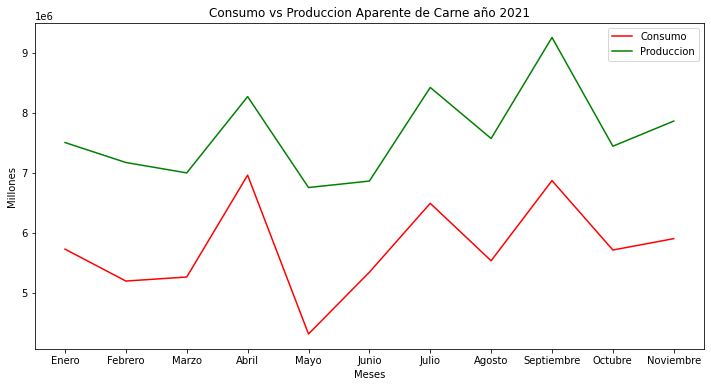

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Aca se ponen las cantidad de variables a mostrar
x1= relacion2["Consumo"] 
x2= relacion2["Producción de Carne"] 

fig, ax = plt.subplots()

#Aca se especifica el color de las lineas y la leyenda
ax.plot(x1, color="red", label="Consumo")
ax.plot(x2, color="green", label="Produccion")
leg = ax.legend()

#Aca se especifican los titulos
ax.set(xlabel='Meses', ylabel='Millones',
       title='Consumo vs Produccion Aparente de Carne año 2021')

fig.set_figheight(6) # Sirve para cambiar el alto de la figura
fig.set_figwidth(12) # Sirve para cambiar el ancho de la figura

   

plt.show()
